In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
%matplotlib inline


df = pd.read_excel('neuro1_data.xls')
df.head()
#df.info()


,time,velo_in,velo_o1,velo_o2,press_in,press_o1,press_o2,wall_shear_[Pa],max_turb_plane_1[J/s]
0,0.01,0.892550,0.781251,0.352017,13778.1680,10902.4609,10902.4609,NaN,NaN
1,0.02,1.165100,1.046288,0.403637,14939.6064,11240.5000,11240.5000,NaN,NaN
2,0.03,1.529589,1.392443,0.507011,17500.1426,11564.7432,11564.7432,NaN,NaN
3,0.04,1.600552,1.477242,0.528815,16590.8535,11875.4033,11875.4063,NaN,NaN
4,0.05,1.671515,1.540919,0.564543,17282.8809,12172.6680,12172.7012,NaN,NaN


Text(0,0.5,'pressure [mmHg]')

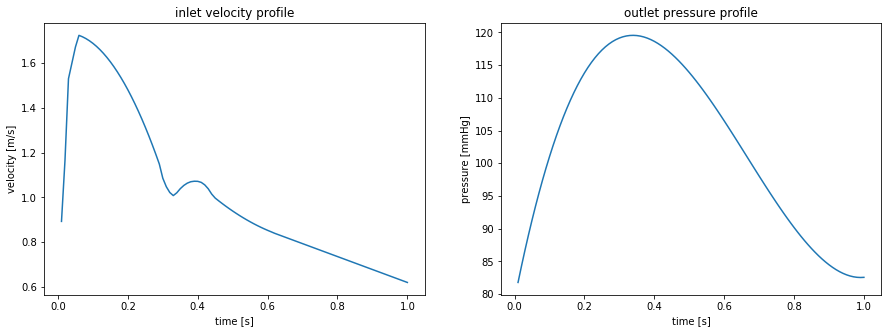

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(df['time'],df['velo_in'], label='inlet velocity profile')
axes[0].set_title('inlet velocity profile')
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('velocity [m/s]')
#axes[0].legend()

axes[1].plot(df['time'],df['press_o1']*0.0075, label='outlet pressure profile')
axes[1].set_title('outlet pressure profile')
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('pressure [mmHg]')
#axes[1].legend()


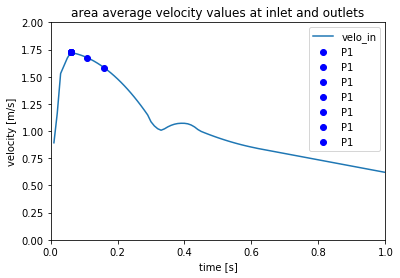

In [19]:
plt.plot(df['time'],df['velo_in'])
plt.plot(df['time'].loc[5],df['velo_in'].loc[5],'bo',label='P1')
plt.plot(df['time'].loc[10],df['velo_in'].loc[10],'bo',label='P1')
plt.plot(df['time'].loc[15],df['velo_in'].loc[15],'bo',label='P1')
plt.plot(df['time'].loc[5],df['velo_in'].loc[5],'bo',label='P1')
plt.plot(df['time'].loc[5],df['velo_in'].loc[5],'bo',label='P1')
plt.plot(df['time'].loc[5],df['velo_in'].loc[5],'bo',label='P1')
plt.plot(df['time'].loc[5],df['velo_in'].loc[5],'bo',label='P1')
#plt.plot(0.06,1.2,'bo')

plt.ylim(0,2)
plt.xlim(0, 1)

plt.title('area average velocity values at inlet and outlets')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.legend()

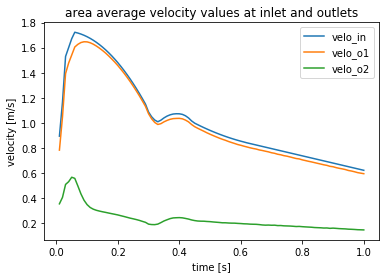

In [39]:
plt.plot(df['time'],df['velo_in'])
plt.plot(df['time'],df['velo_o1'])
plt.plot(df['time'],df['velo_o2'])

#plt.ylim(0,20000)
#plt.xlim(2013, 2018)

plt.title('area average velocity values at inlet and outlets')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.legend()


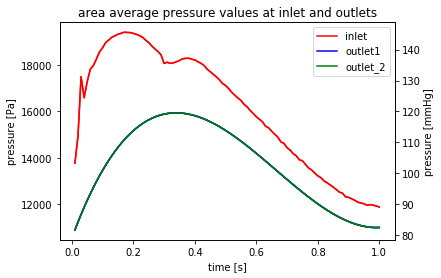

In [51]:
fig, ax = plt.subplots()

ax.plot(df['time'], df['press_in'], label='inlet', color='red')
ax.plot(df['time'], df['press_o1'], label='outlet1', color='blue')
ax.plot(df['time'], df['press_o2'], label='outlet_2', color='green')

ax2 = ax.twinx()
ax2.plot(df['time'], df['press_in']*0.0075, label='inlet', color='red')
ax2.plot(df['time'], df['press_o1']*0.0075, label='outlet1', color='blue')
ax2.plot(df['time'], df['press_o2']*0.0075, label='outlet_2', color='green')

plt.title('area average pressure values at inlet and outlets')

ax.set_xlabel('time [s]')
ax.set_ylabel('pressure [Pa]')
ax2.set_ylabel('pressure [mmHg]')


ax.legend()



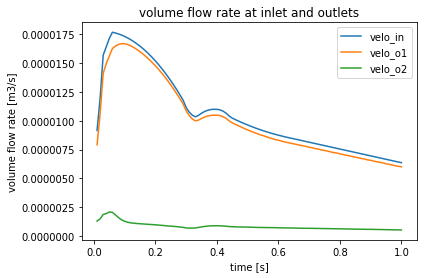

In [53]:
A_in=1.0256e-5
A_o1=1.01291e-5
A_o2=3.69093e-6

plt.plot(df['time'],df['velo_in']*A_in)
plt.plot(df['time'],df['velo_o1']*A_o1)
plt.plot(df['time'],df['velo_o2']*A_o2)

#plt.ylim(0,20000)
#plt.xlim(2013, 2018)

plt.title('volume flow rate at inlet and outlets')
plt.xlabel('time [s]')
plt.ylabel('volume flow rate [m3/s]')
plt.legend()

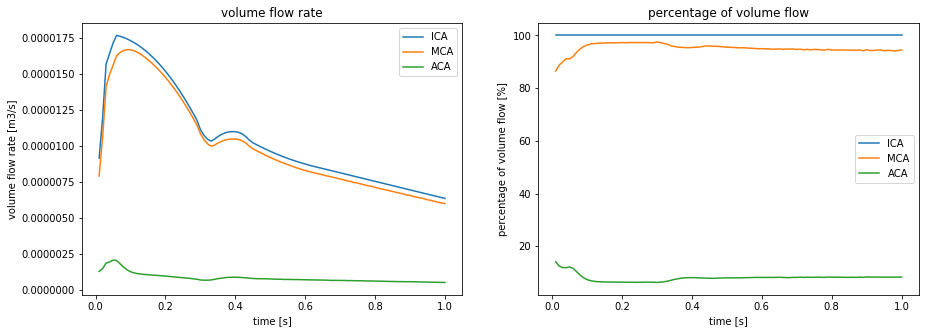

In [38]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(df['time'],df['velo_in']*A_in, label='ICA')
axes[0].plot(df['time'],df['velo_o1']*A_o1, label='MCA')
axes[0].plot(df['time'],df['velo_o2']*A_o2, label='ACA')
axes[0].set_title('volume flow rate')
axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('volume flow rate [m3/s]')
axes[0].legend()

axes[1].plot(df['time'],df['velo_in']*A_in/(df['velo_in']*A_in)*100, label='ICA')
axes[1].plot(df['time'],df['velo_o1']*A_o1/(df['velo_in']*A_in)*100, label='MCA')
axes[1].plot(df['time'],df['velo_o2']*A_o2/(df['velo_in']*A_in)*100, label='ACA')
axes[1].set_title('percentage of volume flow')
axes[1].set_xlabel('time [s]')
axes[1].set_ylabel('percentage of volume flow [%]')
axes[1].legend()

Text(0.5,1,'Programming language usage')

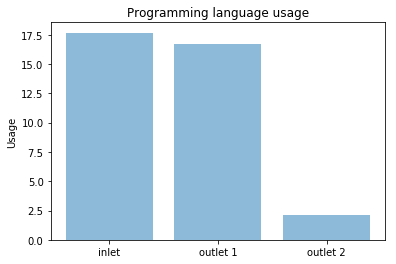

In [34]:
A_in=1.0256e-5
A_o1=1.01291e-5
A_o2=3.69093e-6

#coefficient of artery filling==> max volume flowing into artery during the cycle / area?

eta_in=df['velo_in'].max()*A_in*1000000; #cm3
eta_o1=df['velo_o1'].max()*A_o1*1000000; #cm3
eta_o2=df['velo_o2'].max()*A_o2*1000000; #cm3

objects = ('inlet', 'outlet 1', 'outlet 2')
y_pos = np.arange(len(objects))
performance = [eta_in,eta_o1,eta_o2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('coefficient of artery filling [m2]')
plt.title('coeffcient of artery filling')


In [47]:
fig, axs = plt.subplots(1,2, figsize=(2,3))

path = 'C:/Users/JMosiezny/Desktop/neuro1_output_data_python/new'\n"


os.chdir(path)
filelist = os.listdir(path)

for file in filelist:
     img = mpimg.imread(file)


imgplot = plt.imshow(img)

SyntaxError: unexpected character after line continuation character (<ipython-input-47-1724f08f2aa7>, line 3)